# Required library

In [63]:
import pandas as pd

# Importing Clean data

In [64]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


# Preparing Data For Model Based Forecasting

## Creating T, T_square, Log_T Columns

In [65]:
import numpy as np
pLen = len(df)
df["t"] = np.arange(1,pLen+1)
df["t_square"] = df["t"] * df["t"]
df["log_t"] = np.log(df["quantity"].astype(int)) 
df

,quantity,t,t_square,log_t
date,,,,
2019-12-01,11120,1,1,9.316501
2020-01-01,13043,2,4,9.476007
2020-02-01,12231,3,9,9.411729
2020-03-01,12868,4,16,9.462499
2020-04-01,11731,5,25,9.369990
2020-05-01,12185,6,36,9.407961
2020-06-01,11984,7,49,9.391328
2020-07-01,12559,8,64,9.438193
2020-08-01,12554,9,81,9.437795


## Creating Month Dummy Variables

In [66]:
df['date'] = df.index
df['Month'] = pd.to_datetime(df.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df['Month']))
df = df.drop(['date','Month'], axis=1)
df1 = pd.concat([df, month_dummies], axis = 1)
df1

,quantity,t,t_square,log_t,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2019-12-01,11120,1,1,9.316501,0,0,1,0,0,0,0,0,0,0,0,0
2020-01-01,13043,2,4,9.476007,0,0,0,0,1,0,0,0,0,0,0,0
2020-02-01,12231,3,9,9.411729,0,0,0,1,0,0,0,0,0,0,0,0
2020-03-01,12868,4,16,9.462499,0,0,0,0,0,0,0,1,0,0,0,0
2020-04-01,11731,5,25,9.369990,1,0,0,0,0,0,0,0,0,0,0,0
2020-05-01,12185,6,36,9.407961,0,0,0,0,0,0,0,0,1,0,0,0
2020-06-01,11984,7,49,9.391328,0,0,0,0,0,0,1,0,0,0,0,0
2020-07-01,12559,8,64,9.438193,0,0,0,0,0,1,0,0,0,0,0,0
2020-08-01,12554,9,81,9.437795,0,1,0,0,0,0,0,0,0,0,0,0


## Splitting Prepared Data as train and test

In [67]:
Train = df1.drop(df1.tail(12).index)
Train

,quantity,t,t_square,log_t,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2019-12-01,11120,1,1,9.316501,0,0,1,0,0,0,0,0,0,0,0,0
2020-01-01,13043,2,4,9.476007,0,0,0,0,1,0,0,0,0,0,0,0
2020-02-01,12231,3,9,9.411729,0,0,0,1,0,0,0,0,0,0,0,0
2020-03-01,12868,4,16,9.462499,0,0,0,0,0,0,0,1,0,0,0,0
2020-04-01,11731,5,25,9.369990,1,0,0,0,0,0,0,0,0,0,0,0
2020-05-01,12185,6,36,9.407961,0,0,0,0,0,0,0,0,1,0,0,0
2020-06-01,11984,7,49,9.391328,0,0,0,0,0,0,1,0,0,0,0,0
2020-07-01,12559,8,64,9.438193,0,0,0,0,0,1,0,0,0,0,0,0
2020-08-01,12554,9,81,9.437795,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
Test = df1.tail(12)
Test

,quantity,t,t_square,log_t,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2021-12-01,13576,25,625,9.516059,0,0,1,0,0,0,0,0,0,0,0,0
2022-01-01,15499,26,676,9.648531,0,0,0,0,1,0,0,0,0,0,0,0
2022-02-01,14687,27,729,9.594718,0,0,0,1,0,0,0,0,0,0,0,0
2022-03-01,15324,28,784,9.637176,0,0,0,0,0,0,0,1,0,0,0,0
2022-04-01,14187,29,841,9.560081,1,0,0,0,0,0,0,0,0,0,0,0
2022-05-01,14642,30,900,9.591649,0,0,0,0,0,0,0,0,1,0,0,0
2022-06-01,14441,31,961,9.577827,0,0,0,0,0,0,1,0,0,0,0,0
2022-07-01,15015,32,1024,9.616805,0,0,0,0,0,1,0,0,0,0,0,0
2022-08-01,15011,33,1089,9.616539,0,1,0,0,0,0,0,0,0,0,0,0


# Saved Train and Test Data as csv

In [69]:
Train.to_csv('Train_plastic.csv')

In [70]:
Test.to_csv('test_plastic.csv')

# Model Building

## 1. Linear Regression

In [71]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('quantity ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_linear))**2))
rmse_linear

575.3133470997643

## 2. Exponential Regression

In [72]:
Exp = smf.ols('log_t ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

585.8242076418092

## 3. Quadratic Regression

In [73]:
Quad = smf.ols('quantity ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_Quad))**2))
rmse_Quad

643.3951481505213

## 4. Additive Seasonality

In [74]:
add_sea = smf.ols('quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_add_sea))**2))
rmse_add_sea

1842.2917170831909

## 5. Multiplicative Seasonality

In [75]:
Mul_sea = smf.ols('log_t ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1856.7923620533875

## 6. Additive Seasonality Quadratic Trend

In [76]:
add_sea_Quad = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['quantity'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

0.4414402012861275

## 7. Multiplicative Seasonality Linear Trend

In [77]:
Mul_Add_sea = smf.ols('log_t ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

163.25340655418768

# Testing & Checking Best Model

In [78]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,575.313347
1,rmse_Exp,585.824208
2,rmse_Quad,643.395148
3,rmse_add_sea,1842.291717
4,rmse_add_sea_quad,0.441440
5,rmse_Mult_sea,1856.792362
6,rmse_Mult_add_sea,163.253407


# Forecasting

## 1. Getting Data For Forecasting

In [79]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Allot/plastic/plastic_data_to_forecast.csv"

In [80]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2

,date
0,2022-12-01
1,2023-01-01
2,2023-02-01
3,2023-03-01
4,2023-04-01
5,2023-05-01
6,2023-06-01
7,2023-07-01
8,2023-08-01
9,2023-09-01


## 2. Getting Data Ready

In [81]:
df2['date'] = pd.date_range("2022-12-01", periods=12, freq="MS")
df2['Month'] = pd.to_datetime(df2.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df2['Month']))
df2 = df2.drop(['Month'], axis=1)
df2 = pd.concat([df2, month_dummies], axis = 1)
pLen1 = len(df2)
df2["t"] = np.arange(37,pLen1+1+36)
df2["t_square"] = df2["t"] * df2["t"]
df2 = df2.set_index('date')
df2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
date,,,,,,,,,,,,,,
2022-12-01,0,0,1,0,0,0,0,0,0,0,0,0,37,1369
2023-01-01,0,0,0,0,1,0,0,0,0,0,0,0,38,1444
2023-02-01,0,0,0,1,0,0,0,0,0,0,0,0,39,1521
2023-03-01,0,0,0,0,0,0,0,1,0,0,0,0,40,1600
2023-04-01,1,0,0,0,0,0,0,0,0,0,0,0,41,1681
2023-05-01,0,0,0,0,0,0,0,0,1,0,0,0,42,1764
2023-06-01,0,0,0,0,0,0,1,0,0,0,0,0,43,1849
2023-07-01,0,0,0,0,0,1,0,0,0,0,0,0,44,1936
2023-08-01,0,1,0,0,0,0,0,0,0,0,0,0,45,2025


## 3. Best Model

In [82]:
model_full = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=df1).fit()

# Saving model.pickle

In [83]:
model_full.save("model.pickle")

# To load model

In [84]:
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

## 4. Forecasting

In [85]:
pred_new = pd.Series(model_full.predict(df2))
pred_new

date
2022-12-01    14804.521487
2023-01-01    16727.563298
2023-02-01    15915.605110
2023-03-01    16552.646922
2023-04-01    15415.688734
2023-05-01    15870.063879
2023-06-01    15669.439024
2023-07-01    16243.814170
2023-08-01    16239.189315
2023-09-01    15861.897793
2023-10-01    16505.939605
2023-11-01    17558.314750
dtype: float64

In [86]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,forecasted_quantity
date,,,,,,,,,,,,,,,
2022-12-01,0,0,1,0,0,0,0,0,0,0,0,0,37,1369,14804.521487
2023-01-01,0,0,0,0,1,0,0,0,0,0,0,0,38,1444,16727.563298
2023-02-01,0,0,0,1,0,0,0,0,0,0,0,0,39,1521,15915.605110
2023-03-01,0,0,0,0,0,0,0,1,0,0,0,0,40,1600,16552.646922
2023-04-01,1,0,0,0,0,0,0,0,0,0,0,0,41,1681,15415.688734
2023-05-01,0,0,0,0,0,0,0,0,1,0,0,0,42,1764,15870.063879
2023-06-01,0,0,0,0,0,0,1,0,0,0,0,0,43,1849,15669.439024
2023-07-01,0,0,0,0,0,1,0,0,0,0,0,0,44,1936,16243.814170
2023-08-01,0,1,0,0,0,0,0,0,0,0,0,0,45,2025,16239.189315


## 5. Finding Residuals

In [87]:
full_res = df1.quantity - model_full.predict(df1)
full_res

date
2019-12-01    0.009872
2020-01-01    0.030778
2020-02-01    0.051684
2020-03-01    0.072590
2020-04-01    0.093496
2020-05-01   -0.218931
2020-06-01   -0.531359
2020-07-01    0.156214
2020-08-01   -0.156214
2020-09-01    0.198026
2020-10-01    0.218931
2020-11-01   -0.093496
2020-12-01    0.083624
2021-01-01    0.083624
2021-02-01    0.083624
2021-03-01    0.083624
2021-04-01    0.083624
2021-05-01   -0.249710
2021-06-01    0.416957
2021-07-01    0.083624
2021-08-01   -0.249710
2021-09-01    0.083624
2021-10-01    0.083624
2021-11-01   -0.249710
2021-12-01   -0.093496
2022-01-01   -0.114402
2022-02-01   -0.135308
2022-03-01   -0.156214
2022-04-01   -0.177120
2022-05-01    0.468641
2022-06-01    0.114402
2022-07-01   -0.239837
2022-08-01    0.405923
2022-09-01   -0.281649
2022-10-01   -0.302555
2022-11-01    0.343206
dtype: float64

## 6. ACF Plot on Residuals

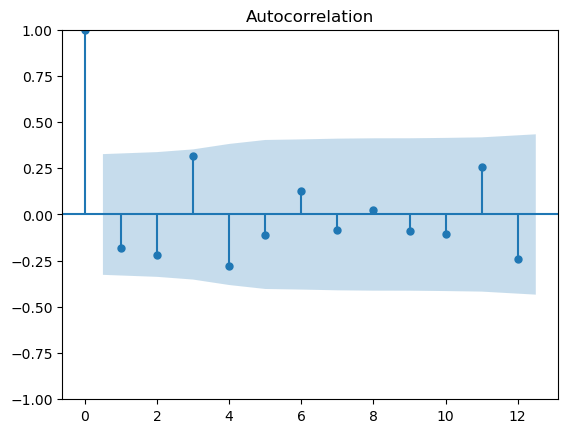

In [88]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


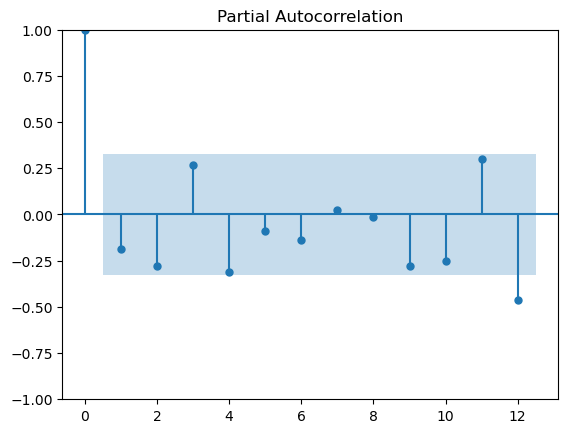

In [89]:
tsa_plots.plot_pacf(full_res, lags=12);

## 8. Autoregression Model

In [90]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[12])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Coefficients: const    0.010246
y.L12   -0.460211
dtype: float64


0     0.053274
1     0.062895
2     0.072517
3     0.082138
4     0.091759
5    -0.205428
6    -0.042403
7     0.120622
8    -0.176564
9     0.139865
10    0.149486
11   -0.147701
dtype: float64

In [92]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,forecasted_quantity,Residuals
date,,,,,,,,,,,,,,,,
2022-12-01,0,0,1,0,0,0,0,0,0,0,0,0,37,1369,14804.521487,0.053274
2023-01-01,0,0,0,0,1,0,0,0,0,0,0,0,38,1444,16727.563298,0.062895
2023-02-01,0,0,0,1,0,0,0,0,0,0,0,0,39,1521,15915.605110,0.072517
2023-03-01,0,0,0,0,0,0,0,1,0,0,0,0,40,1600,16552.646922,0.082138
2023-04-01,1,0,0,0,0,0,0,0,0,0,0,0,41,1681,15415.688734,0.091759
2023-05-01,0,0,0,0,0,0,0,0,1,0,0,0,42,1764,15870.063879,-0.205428
2023-06-01,0,0,0,0,0,0,1,0,0,0,0,0,43,1849,15669.439024,-0.042403
2023-07-01,0,0,0,0,0,1,0,0,0,0,0,0,44,1936,16243.814170,0.120622
2023-08-01,0,1,0,0,0,0,0,0,0,0,0,0,45,2025,16239.189315,-0.176564


In [93]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,forecasted_quantity,Residuals,final_forecast
date,,,,,,,,,,,,,,,,,
2022-12-01,0,0,1,0,0,0,0,0,0,0,0,0,37,1369,14804.521487,0.053274,14804.574761
2023-01-01,0,0,0,0,1,0,0,0,0,0,0,0,38,1444,16727.563298,0.062895,16727.626194
2023-02-01,0,0,0,1,0,0,0,0,0,0,0,0,39,1521,15915.605110,0.072517,15915.677627
2023-03-01,0,0,0,0,0,0,0,1,0,0,0,0,40,1600,16552.646922,0.082138,16552.729060
2023-04-01,1,0,0,0,0,0,0,0,0,0,0,0,41,1681,15415.688734,0.091759,15415.780493
2023-05-01,0,0,0,0,0,0,0,0,1,0,0,0,42,1764,15870.063879,-0.205428,15869.858452
2023-06-01,0,0,0,0,0,0,1,0,0,0,0,0,43,1849,15669.439024,-0.042403,15669.396622
2023-07-01,0,0,0,0,0,1,0,0,0,0,0,0,44,1936,16243.814170,0.120622,16243.934792
2023-08-01,0,1,0,0,0,0,0,0,0,0,0,0,45,2025,16239.189315,-0.176564,16239.012751


In [94]:
df3 = df3[['forecasted_quantity','Residuals','final_forecast']]
df3

,forecasted_quantity,Residuals,final_forecast
date,,,
2022-12-01,14804.521487,0.053274,14804.574761
2023-01-01,16727.563298,0.062895,16727.626194
2023-02-01,15915.605110,0.072517,15915.677627
2023-03-01,16552.646922,0.082138,16552.729060
2023-04-01,15415.688734,0.091759,15415.780493
2023-05-01,15870.063879,-0.205428,15869.858452
2023-06-01,15669.439024,-0.042403,15669.396622
2023-07-01,16243.814170,0.120622,16243.934792
2023-08-01,16239.189315,-0.176564,16239.012751


# Forecasting Result

<AxesSubplot:xlabel='date'>

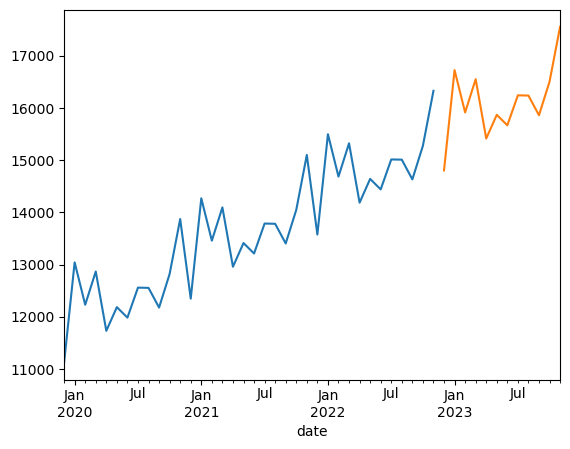

In [95]:
df1.quantity.plot()
df3.final_forecast.plot()

# Saving Forecasted Data

In [96]:
df3.to_csv('Model_Based_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Allot\\plastic\\Model_Based_forecasting'